[[ 1.86189843  2.72296272  0.        ]
 [ 2.23589604 -2.15772062  0.        ]
 [ 1.69281688  0.99589606  0.        ]
 ...
 [ 4.46678886  3.44492577  1.        ]
 [ 5.65897988  4.04334073  1.        ]
 [ 1.98017955  7.15815205  1.        ]]
(2000, 3)
[0.71310953 0.70105263]


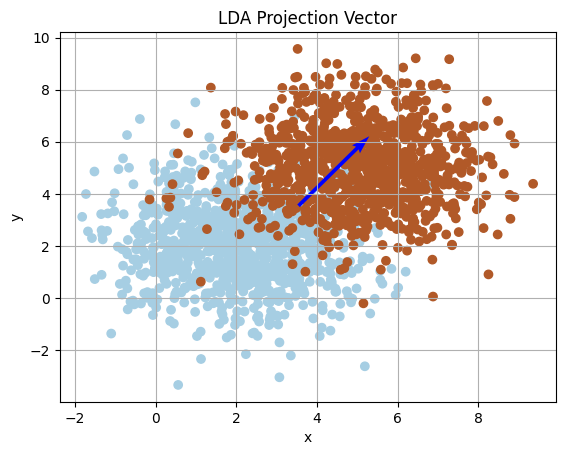

In [92]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def ComputeMeanDiff(X):
  m1 = np.array([0.0, 0.0])
  m2 = np.array([0.0, 0.0])
  n1 = 0
  n2 = 0
  for sample in X:
    if sample[2]==0:
      m1+=sample[:2]
      n1+=1
    else:
      m2+=sample[:2]
      n2+=1
  m1 = m1/n1
  m2 = m2/n2
  return m1 - m2

def ComputeSW(X):
  sw1 = np.zeros((2, 2))
  sw2 = np.zeros((2, 2))
  m1 = np.array([0.0, 0.0])
  m2 = np.array([0.0, 0.0])
  n1 = 0
  n2 = 0
  for sample in X:
    if sample[2]==0:
      m1+=sample[:2]
      n1+=1
    else:
      m2+=sample[:2]
      n2+=1
  m1 = m1/n1
  m2 = m2/n2
  # m = np.array([m1,m2])
  for sample in X:
        if sample[2] == 0:
            diff = (sample[:2] - m1)
            sw1 += np.dot(diff.reshape(-1, 1), diff.reshape(1, -1))
        else:
            diff = (sample[:2] - m2)
            sw2 += np.dot(diff.reshape(-1, 1), diff.reshape(1, -1))
  return sw1 + sw2

def ComputeSB(X):
  m1 = np.array([0.0, 0.0])
  m2 = np.array([0.0, 0.0])
  n1 = 0
  n2 = 0
  for sample in X:
    if sample[2]==0:
      m1+=sample[:2]
      n1+=1
    else:
      m2+=sample[:2]
      n2+=1
  m1 = m1/n1
  m2 = m2/n2
  sb = np.outer((m1-m2),np.transpose(m1-m2))
  return sb

def GetLDAProjectionVector(X):
    sw = ComputeSW(X)
    sb = ComputeSB(X)
    eigvals, eigvecs = np.linalg.eig(np.dot(np.linalg.inv(sw), sb))
    i = np.argmax(eigvals)
    return eigvecs[:, i]

def project(x,y,w):
    point = np.array([x, y])
    return np.dot(w, point)

#########################################################
###################Helper Code###########################
#########################################################

X = np.empty((0, 3))
with open('data.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for sample in csvFile:
        sample = [float(val) for val in sample]  # Convert elements to float
        X = np.vstack((X, sample))

print(X)
print(X.shape)
# X Contains (x,y) and class label 0.0 or 1.0

w=GetLDAProjectionVector(X)
print(w)


plt.scatter(X[:, 0], X[:, 1], c=X[:, 2], cmap=plt.cm.Paired, marker='o')
mean_point = np.mean(X[:, :2], axis=0)
plt.quiver(*mean_point, *w, scale=5, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('LDA Projection Vector')
plt.grid(True)
plt.show()

In [93]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data
X = np.empty((0, 3))
with open('data.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for sample in csvFile:
        sample = [float(val) for val in sample]  # Convert elements to float
        X = np.vstack((X, sample))

# Split the data into features (X) and labels (y)
X_features = X[:, :2]
y_labels = X[:, 2]

# Split the dataset into training and testing sets for both original and projected data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_features, y_labels, test_size=0.2, random_state=59)

# Project the data using LDA
w = GetLDAProjectionVector(X)
X_proj = np.dot(X_features, w.reshape(-1, 1))

# Split the projected data into training and testing sets
X_train_proj, X_test_proj, y_train_proj, y_test_proj = train_test_split(X_proj, y_labels, test_size=0.2, random_state=59)

# Train the 1-NN classifier on original data
knn_orig = KNeighborsClassifier(n_neighbors=1)
knn_orig.fit(X_train_orig, y_train_orig)

# Train the 1-NN classifier on projected data
knn_proj = KNeighborsClassifier(n_neighbors=1)
knn_proj.fit(X_train_proj, y_train_proj)

# Evaluate the performance on testing set for original data
y_pred_orig = knn_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)

# Evaluate the performance on testing set for projected data
y_pred_proj = knn_proj.predict(X_test_proj)
accuracy_proj = accuracy_score(y_test_proj, y_pred_proj)

# Print the accuracies
print("Accuracy of 1-NN classifier on original data:", accuracy_orig)
print("Accuracy of 1-NN classifier on projected data:", accuracy_proj)

Accuracy of 1-NN classifier on original data: 0.88
Accuracy of 1-NN classifier on projected data: 0.905


In [94]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# TASK 0

data = pd.read_csv('naive_bayes.csv')
# Separate features (X) and target variable (y)
X = data.iloc[:, :-1]  # Select all columns except the last one as features
y = data.iloc[:, -1]   # Select the last column as target variable
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=12, test_size=2,random_state = 100)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# TASK 1

# Calculate prior probabilities on the training data
train_yeses = 0
train_nos = 0
for label in y_train:
    if label == 'yes':
        train_yeses += 1
    elif label == 'no':
        train_nos += 1

prior_train_yes = train_yeses / len(y_train)
prior_train_no = train_nos / len(y_train)

print('P(Play=yes) on training data:', prior_train_yes)
print('P(Play=no) on training data:', prior_train_no)

X_train shape: (12, 4)
X_test shape: (2, 4)
y_train shape: (12,)
y_test shape: (2,)
P(Play=yes) on training data: 0.5833333333333334
P(Play=no) on training data: 0.4166666666666667


In [95]:
# Calculate likelihood probabilities for 'Play = yes' on the training dataset
likelihood_train_yes = {}

for feature in X_train.columns:
    likelihood_train_yes[feature] = {}
    # Iterate through each unique value of the feature
    for value in X_train[feature].unique():
        # Count occurrences of the value when 'Play = yes' in the training data
        count = X_train[(X_train[feature] == value) & (y_train == 'yes')].shape[0]
        # Calculate likelihood probability: P(Feature = value | Play = yes)
        likelihood_train_yes[feature][value] = count / train_yeses

# Calculate likelihood probabilities for 'Play = no' on the training dataset
likelihood_train_no = {}

for feature in X_train.columns:
    likelihood_train_no[feature] = {}
    # Iterate through each unique value of the feature
    for value in X_train[feature].unique():
        # Count occurrences of the value when 'Play = no' in the training data
        count = X_train[(X_train[feature] == value) & (y_train == 'no')].shape[0]
        # Calculate likelihood probability: P(Feature = value | Play = no)
        likelihood_train_no[feature][value] = count / train_nos

# Print likelihood probabilities for 'Play = yes' on the training dataset
print("Likelihood probabilities for 'Play = yes' on the training dataset:")
for feature, probabilities in likelihood_train_yes.items():
    for value, probability in probabilities.items():
        print(f"P({feature} = {value} | Play = yes): {probability:.2f}")

# Print likelihood probabilities for 'Play = no' on the training dataset
print("\nLikelihood probabilities for 'Play = no' on the training dataset:")
for feature, probabilities in likelihood_train_no.items():
    for value, probability in probabilities.items():
        print(f"P({feature} = {value} | Play = no): {probability:.2f}")

Likelihood probabilities for 'Play = yes' on the training dataset:
P(Outlook = Sunny | Play = yes): 0.43
P(Outlook = Rainy | Play = yes): 0.29
P(Outlook = Overcast | Play = yes): 0.29
P(Temp = Cool | Play = yes): 0.43
P(Temp = Hot | Play = yes): 0.14
P(Temp = Mild | Play = yes): 0.43
P(Humidity = Normal | Play = yes): 0.71
P(Humidity = High | Play = yes): 0.29
P(Windy = t | Play = yes): 0.29
P(Windy = f | Play = yes): 0.71

Likelihood probabilities for 'Play = no' on the training dataset:
P(Outlook = Sunny | Play = no): 0.40
P(Outlook = Rainy | Play = no): 0.60
P(Outlook = Overcast | Play = no): 0.00
P(Temp = Cool | Play = no): 0.20
P(Temp = Hot | Play = no): 0.40
P(Temp = Mild | Play = no): 0.40
P(Humidity = Normal | Play = no): 0.20
P(Humidity = High | Play = no): 0.80
P(Windy = t | Play = no): 0.60
P(Windy = f | Play = no): 0.40


In [100]:
posterior_probs = []

# Iterate through each sample in the testing data
for idx, sample in X_test.iterrows():
    posterior_yes = prior_train_yes
    posterior_no = prior_train_no
    # Iterate through each feature and update the posterior probabilities
    for feature, value in sample.items():
        likelihood_yes = likelihood_train_yes[feature].get(value, 0.01)  # Default value if likelihood is zero
        likelihood_no = likelihood_train_no[feature].get(value, 0.01)  # Default value if likelihood is zero

        # Check if likelihood is zero
        if likelihood_yes == 0 or likelihood_no == 0:
            print(f"Zero likelihood probability found for feature '{feature}' and value '{value}'")

        posterior_yes *= likelihood_yes
        posterior_no *= likelihood_no

    # Normalize the posterior probabilities
    evidence = posterior_yes + posterior_no
    posterior_yes /= evidence
    posterior_no /= evidence

    # Append the posterior probabilities for this sample to the list along with sample ID
    posterior_probs.append({'Sample ID': idx, 'Play = yes': posterior_yes, 'Play = no': posterior_no})

# Convert the list of dictionaries to a DataFrame for better representation
posterior_probs_df = pd.DataFrame(posterior_probs)
# Set the sample ID as the index of the DataFrame
posterior_probs_df.set_index('Sample ID', inplace=True)
# Print the DataFrame containing posterior probabilities for each class
print("Posterior Probabilities for Testing Split:")
print(posterior_probs_df)


Zero likelihood probability found for feature 'Outlook' and value 'Overcast'
Zero likelihood probability found for feature 'Outlook' and value 'Overcast'
Posterior Probabilities for Testing Split:
           Play = yes  Play = no
Sample ID                       
11                1.0        0.0
12                1.0        0.0


In [97]:
predictions = []

for idx, row in posterior_probs_df.iterrows():
    if row['Play = yes'] > row['Play = no']:
        predictions.append(('yes', idx))  # Append prediction along with sample ID
    else:
        predictions.append(('no', idx))   # Append prediction along with sample ID

# Convert the list of tuples to a pandas DataFrame for better representation
predictions_df = pd.DataFrame(predictions, columns=['Prediction', 'Sample ID'])
# Set the sample ID as the index of the DataFrame
predictions_df.set_index('Sample ID', inplace=True)
# Print the predictions
print("Predictions:")
print(predictions_df)

# Calculate accuracy
correct_predictions = 0
for idx, row in predictions_df.iterrows():
    if row['Prediction'] == y_test.loc[idx]:
        correct_predictions += 1

accuracy = correct_predictions / len(predictions_df)
print("Accuracy:", accuracy)

Predictions:
          Prediction
Sample ID           
11               yes
12               yes
Accuracy: 1.0


In [98]:
# TASK 5

# Laplace Smoothing
likelihood_yes_laplas = {}
likelihood_no_laplas = {}

alpha = 1  # Laplace smoothing parameter
K = len(X_train.columns)  # Number of features

# Calculate Laplace smoothed likelihood probabilities for 'Play = yes'
for feature in X_train.columns:
    likelihood_yes_laplas[feature] = {}
    for value in X_train[feature].unique():
        count = X_train[(X_train[feature] == value) & (y_train == 'yes')].shape[0] + alpha
        likelihood_yes_laplas[feature][value] = count / (train_yeses + K * alpha)

# Calculate Laplace smoothed likelihood probabilities for 'Play = no'
for feature in X_train.columns:
    likelihood_no_laplas[feature] = {}
    for value in X_train[feature].unique():
        count = X_train[(X_train[feature] == value) & (y_train == 'no')].shape[0] + alpha
        likelihood_no_laplas[feature][value] = count / (train_nos + K * alpha)

# Print Laplace smoothed likelihood probabilities for 'Play = yes'
print("Laplace smoothed likelihood probabilities for 'Play = yes':")
for feature, probabilities in likelihood_yes_laplas.items():
    for value, probability in probabilities.items():
        print(f"P({feature} = {value} | Play = yes): {probability:.2f}")

# Print Laplace smoothed likelihood probabilities for 'Play = no'
print("\nLaplace smoothed likelihood probabilities for 'Play = no':")
for feature, probabilities in likelihood_no_laplas.items():
    for value, probability in probabilities.items():
        print(f"P({feature} = {value} | Play = no): {probability:.2f}")

print()

# Calculate posterior probabilities with Laplace smoothing
posterior_probs_laplas = []
for idx, sample in X_test.iterrows():
    posterior_yes_laplas = prior_train_yes
    posterior_no_laplas = prior_train_no
    for feature, value in sample.items():
        posterior_yes_laplas *= likelihood_yes_laplas[feature][value]
        posterior_no_laplas *= likelihood_no_laplas[feature][value]
    evidence = posterior_yes_laplas + posterior_no_laplas
    posterior_yes_laplas /= evidence
    posterior_no_laplas /= evidence
    posterior_probs_laplas.append({'Play = yes': posterior_yes_laplas, 'Play = no': posterior_no_laplas})

# Convert the list of dictionaries to a DataFrame
posterior_probs_laplas_df = pd.DataFrame(posterior_probs_laplas)

# Print the posterior probabilities DataFrame with Laplace smoothing
print("Posterior Probabilities with Laplace Smoothing for Testing Split:")
print(posterior_probs_laplas_df)

print()

# Make predictions with Laplace smoothing
predictions_laplas = []
for _, row in posterior_probs_laplas_df.iterrows():
    if row['Play = yes'] > row['Play = no']:
        predictions_laplas.append('yes')
    else:
        predictions_laplas.append('no')

# Convert the list of predictions to a pandas Series for better representation
predictions_series_laplas = pd.Series(predictions_laplas)

# Print the predictions with Laplace smoothing
print("Predictions with Laplace Smoothing:")
print(predictions_series_laplas)

# Calculate accuracy
accuracy_laplas = accuracy_score(y_test, predictions_laplas)
print("Accuracy with Laplace Smoothing:", accuracy_laplas)


Laplace smoothed likelihood probabilities for 'Play = yes':
P(Outlook = Sunny | Play = yes): 0.36
P(Outlook = Rainy | Play = yes): 0.27
P(Outlook = Overcast | Play = yes): 0.27
P(Temp = Cool | Play = yes): 0.36
P(Temp = Hot | Play = yes): 0.18
P(Temp = Mild | Play = yes): 0.36
P(Humidity = Normal | Play = yes): 0.55
P(Humidity = High | Play = yes): 0.27
P(Windy = t | Play = yes): 0.27
P(Windy = f | Play = yes): 0.55

Laplace smoothed likelihood probabilities for 'Play = no':
P(Outlook = Sunny | Play = no): 0.33
P(Outlook = Rainy | Play = no): 0.44
P(Outlook = Overcast | Play = no): 0.11
P(Temp = Cool | Play = no): 0.22
P(Temp = Hot | Play = no): 0.33
P(Temp = Mild | Play = no): 0.33
P(Humidity = Normal | Play = no): 0.22
P(Humidity = High | Play = no): 0.56
P(Windy = t | Play = no): 0.44
P(Windy = f | Play = no): 0.33

Posterior Probabilities with Laplace Smoothing for Testing Split:
   Play = yes  Play = no
0    0.530357   0.469643
1    0.882746   0.117254

Predictions with Laplace Sm